In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 4: Exploring Data

In [3]:
 #Step 4: Exploring Data
 """ 
R> library("MSA")
R> data("mcdonalds", package = "MSA")
R> names(mcdonalds)
 """

# Load the dataset
mcdonalds_data = pd.read_csv('mcdonalds.csv')

# Inspect basic features
# Get variable names (column names)
variable_names = mcdonalds_data.columns.tolist()

# Get the sample size (number of rows)
sample_size = mcdonalds_data.shape[0]

# Display the first three rows of the dataset
first_three_rows = mcdonalds_data.head(6)

# Print the results
print("Variable Names:", variable_names)
print("Sample Size:", sample_size)
print("First Three Rows:\n", first_three_rows)


Variable Names: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Sample Size: 1453
First Three Rows:
   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   
5   Yes        Yes    No       Yes     No  Yes   Yes   Yes        No      No   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Ye

In [4]:
""" 
R> MD.x <- as.matrix(mcdonalds[, 1:11])
R> MD.x <- (MD.x == "Yes") + 0
R> round(colMeans(MD.x), 2)
"""

# Convert the first 11 columns to a NumPy array (matrix)
MD_x = mcdonalds.iloc[:, :11].to_numpy()

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means and round to 2 decimal places
column_means = np.round(MD_x.mean(axis=0), 2)

# Print the result
print("Column Means:", column_means)


Column Means: [0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [7]:
"""
R> MD.pca <- prcomp(MD.x)
R> summary(MD.pca) 
"""


# Perform PCA on the dataset
pca = PCA()
MD_pca = pca.fit(MD_x)

# Get summary statistics
explained_variance_ratio = pca.explained_variance_ratio_  # Proportion of Variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)  # Cumulative Proportion
standard_deviations = np.sqrt(pca.explained_variance_)  # Standard deviations (square root of eigenvalues)

# Create a summary DataFrame
summary = pd.DataFrame({
    "Standard Deviation": np.round(standard_deviations, 4),
    "Proportion of Variance": np.round(explained_variance_ratio, 4),
    "Cumulative Proportion": np.round(cumulative_variance_ratio, 4)
})

# Display the summary
print("PCA Summary:")
print(summary)


PCA Summary:
    Standard Deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000


In [9]:
"""
R> print(MD.pca, digits = 1) 
"""

# Get explained variance ratio and components
explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

# Format the output to 1 decimal place
print("Explained Variance Ratio (Proportion of Variance):")
print(np.round(explained_variance_ratio, 1))

print("\nPCA Components (Loadings):")
print(np.round(components, 1))

Explained Variance Ratio (Proportion of Variance):
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

PCA Components (Loadings):
[[ 0.5  0.2  0.  -0.1 -0.3  0.1  0.3  0.5 -0.3  0.2 -0.4]
 [-0.4 -0.  -0.   0.   0.1  0.1  0.6 -0.3 -0.6 -0.1  0.1]
 [ 0.3  0.1  0.   0.3  0.8  0.1  0.1  0.3 -0.  -0.2  0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [ 0.3 -0.3 -0.1  0.1 -0.4 -0.1  0.1  0.2  0.  -0.3  0.7]
 [-0.2  0.3  0.4  0.4 -0.2  0.6  0.1  0.1  0.3  0.2  0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [-0.   0.1 -0.4 -0.6  0.1  0.6 -0.1  0.1 -0.  -0.2  0.2]
 [-0.6  0.  -0.4  0.2  0.  -0.2 -0.1  0.6 -0.1  0.2  0.1]
 [ 0.1  0.7  0.1  0.  -0.  -0.2 -0.4 -0.1 -0.5  0.   0.3]
 [-0.   0.5 -0.1 -0.3 -0.  -0.3  0.5 -0.   0.5 -0.2  0. ]]


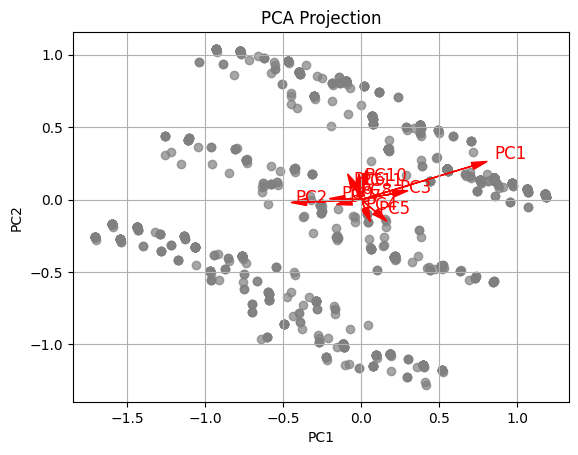

In [12]:
"""
R> library("flexclust")
R> plot(predict(MD.pca), col = "grey")
R> projAxes(MD.pca) 
"""

# PCA-transformed data
pca_transformed = pca.transform(MD_x)

# Plotting the PCA-transformed data
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], color='grey', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")

# Projecting the PCA axes
for i, (component, variance) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
    plt.arrow(0, 0, component[0] * variance * 5, component[1] * variance * 5, 
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(component[0] * variance * 5 * 1.2, component[1] * variance * 5 * 1.2, 
             f"PC{i+1}", color='red', fontsize=12)

plt.grid()
plt.show()


#### Step 5: Extracting Segments

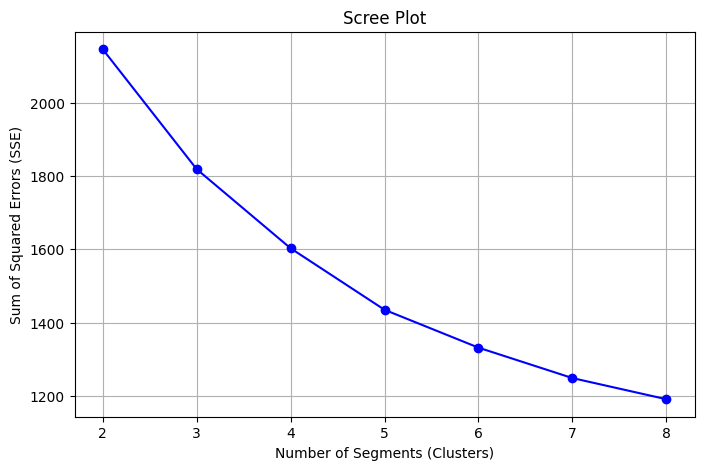

In [14]:
""" 
R> set.seed(1234)
R> MD.km28 <- stepFlexclust(MD.x, 2:8, nrep = 10,
+ verbose = FALSE)
R> MD.km28 <- relabel(MD.km28)
R> plot(MD.km28, xlab = "number of segments")
"""
from sklearn.cluster import KMeans
# Set a random seed for reproducibility
np.random.seed(1234)

# Perform k-means clustering for 2 to 8 clusters
clusters = range(2, 9)
sse = []  # Sum of squared errors for each number of clusters
results = {}

for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)  # Assuming MD_x is the binary data matrix
    sse.append(kmeans.inertia_)  # Append the sum of squared distances
    results[k] = kmeans.labels_  # Store cluster labels for relabeling

# Plot the scree plot
plt.figure(figsize=(8, 5))
plt.plot(clusters, sse, marker='o', linestyle='-', color='b')
plt.title("Scree Plot")
plt.xlabel("Number of Segments (Clusters)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid()
plt.show()

# Relabel clusters for consistency across solutions (optional)
# Relabeling is highly use-case specific; this step ensures consistent labeling.
# Example: Swap labels if necessary based on interpretation or centroids.
relabelled_results = results  # Apply custom relabeling logic here if needed.


C:\Users\amren\AppData\Local\Temp\ipykernel_18376\96353966.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ari_results[k] for k in clusters], labels=clusters, notch=True)


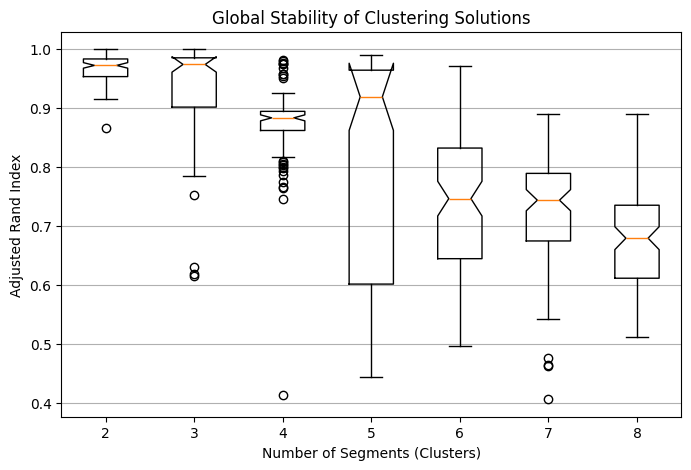

In [15]:
"""
R> set.seed(1234)
R> MD.b28 <- bootFlexclust(MD.x, 2:8, nrep = 10,
+ nboot = 100)
We obtain the global stability boxplot shown in Fig. A.3 using:
R> plot(MD.b28, xlab = "number of segments",
+ ylab = "adjusted Rand index")
"""

from sklearn.metrics import adjusted_rand_score

# Set random seed for reproducibility
np.random.seed(1234)

# Parameters
clusters = range(2, 9)  # Number of segments to evaluate (2 to 8)
nrep = 10  # Number of restarts for k-means
nboot = 100  # Number of bootstrap samples

# Placeholder for adjusted Rand indices for each number of clusters
ari_results = {k: [] for k in clusters}

# Perform bootstrapping
for k in clusters:
    original_kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    original_kmeans.fit(MD_x)  # Assuming MD_x is the binary data matrix
    original_labels = original_kmeans.labels_
    
    for _ in range(nboot):
        # Bootstrap sample with replacement
        bootstrap_indices = np.random.choice(len(MD_x), len(MD_x), replace=True)
        bootstrap_sample = MD_x[bootstrap_indices]
        
        # Fit k-means on the bootstrap sample
        bootstrap_kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        bootstrap_kmeans.fit(bootstrap_sample)
        bootstrap_labels = bootstrap_kmeans.predict(MD_x)  # Predict on the full dataset
        
        # Calculate the adjusted Rand index between original and bootstrap labels
        ari = adjusted_rand_score(original_labels, bootstrap_labels)
        ari_results[k].append(ari)

# Create a boxplot of ARI values for each number of segments
plt.figure(figsize=(8, 5))
plt.boxplot([ari_results[k] for k in clusters], labels=clusters, notch=True)
plt.title("Global Stability of Clustering Solutions")
plt.xlabel("Number of Segments (Clusters)")
plt.ylabel("Adjusted Rand Index")
plt.grid(axis='y')
plt.show()


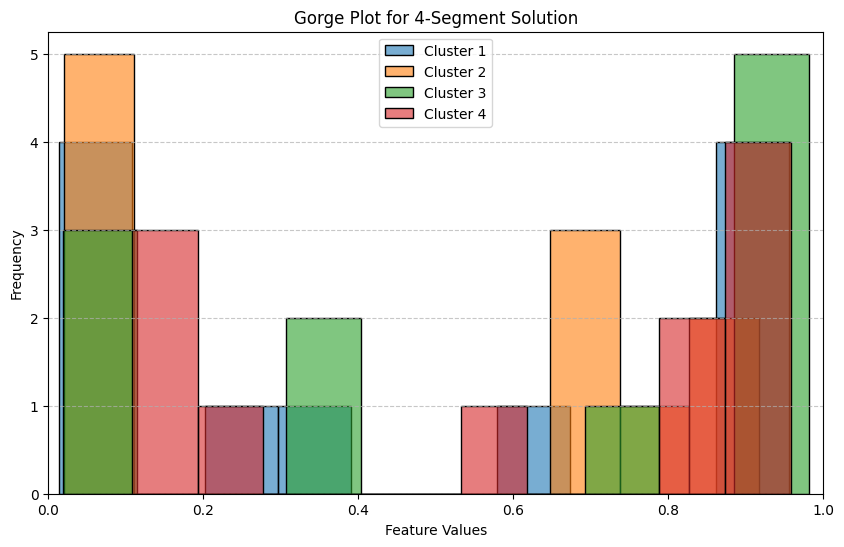

In [18]:
""" 
R> histogram(MD.km28[["4"]], data = MD.x, xlim = 0:1)
"""
# Extract cluster assignments for the 4-cluster solution
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4.fit(MD_x)
labels_4 = kmeans_4.labels_

# Plot histogram for each cluster
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = MD_x[labels_4 == cluster].mean(axis=0)  # Mean feature values per cluster
    sns.histplot(cluster_data, kde=False, bins=10, label=f"Cluster {cluster+1}", alpha=0.6)

plt.xlim(0, 1)  # Set x-axis limits similar to `xlim = 0:1` in R
plt.xlabel("Feature Values")
plt.ylabel("Frequency")
plt.title("Gorge Plot for 4-Segment Solution")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

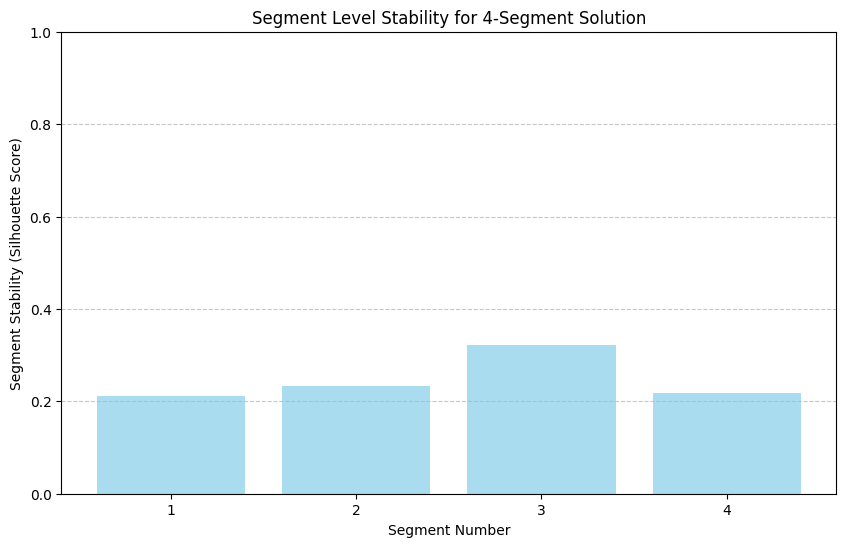

In [20]:
from sklearn.metrics import silhouette_samples
# MD.km28 should contain the KMeans solution for 2-8 segments (we assume 4 segments here)
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4.fit(MD_x)

# Extract the segment labels for the 4-cluster solution
labels_4 = kmeans_4.labels_

# Compute silhouette scores for each sample in the dataset for the 4-segment solution
silhouette_vals = silhouette_samples(MD_x, labels_4)

# Calculate segment-level stability by computing the average silhouette score for each cluster
segment_stability = []
for i in range(4):  # For each cluster
    cluster_silhouette_vals = silhouette_vals[labels_4 == i]
    stability_score = np.mean(cluster_silhouette_vals)  # Average silhouette score
    segment_stability.append(stability_score)

# Plotting the segment-level stability scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, 5), segment_stability, color='skyblue', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability (Silhouette Score)')
plt.title('Segment Level Stability for 4-Segment Solution')
plt.xticks(range(1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

   Number of Clusters           BIC           AIC
0                   2  -8758.617306  -9577.232084
1                   3 -22234.173543 -23464.736403
2                   4 -25216.896819 -26859.407760
3                   5 -32895.428716 -34949.887740
4                   6 -33544.658040 -36011.065145
5                   7 -30143.931765 -33022.286952
6                   8 -38785.695372 -42075.998640


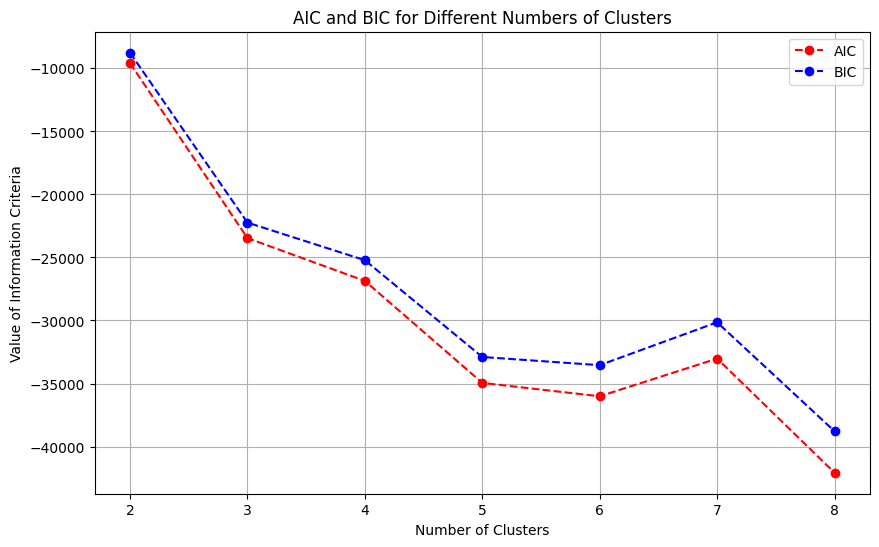

GMM       0    1    2    3
KMeans                    
0       546    0    1   33
1         0  213   11    4
2        46    3  265    8
3        29   38    0  256


In [23]:
""" 
R-code:
R> set.seed(1234)
R> MD.m28 <- stepFlexmix(MD.x ~ 1, k = 2:8, nrep = 10,
+ model = FLXMCmvbinary(), verbose = FALSE)
R> MD.m28
Call:
stepFlexmix(MD.x ~ 1, model = FLXMCmvbinary(),
k = 2:8, nrep = 10, verbose = FALSE)
R> plot(MD.m28,
+ ylab = "value of information criteria (AIC, BIC, ICL)")
R> MD.m4 <- getModel(MD.m28, which = "4")
R> table(kmeans = clusters(MD.k4),
+ mixture = clusters(MD.m4))
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Assuming MD_x is the dataset (binary matrix from 'mcdonalds.csv')
# Convert MD_x to a pandas DataFrame if it's a NumPy array
MD_x = pd.DataFrame(MD_x)

# Apply LabelEncoder to each column (if MD_x is binary and needs encoding)
label_encoder = LabelEncoder()
MD_x = MD_x.apply(label_encoder.fit_transform)

# Set random seed for reproducibility
np.random.seed(1234)

# Fit Gaussian Mixture Model for k = 2 to 8 clusters
bic_scores = []
aic_scores = []
n_clusters_range = range(2, 9)
for k in n_clusters_range:
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)
    bic_scores.append(gmm.bic(MD_x))
    aic_scores.append(gmm.aic(MD_x))

# Create a DataFrame to show BIC, AIC values for each k
criteria_df = pd.DataFrame({
    'Number of Clusters': n_clusters_range,
    'BIC': bic_scores,
    'AIC': aic_scores
})

# Print the results
print(criteria_df)

# Plot the AIC, BIC, ICL (approximation) values
plt.figure(figsize=(10, 6))
plt.plot(criteria_df['Number of Clusters'], criteria_df['AIC'], marker='o', label='AIC', linestyle='--', color='red')
plt.plot(criteria_df['Number of Clusters'], criteria_df['BIC'], marker='o', label='BIC', linestyle='--', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria')
plt.title('AIC and BIC for Different Numbers of Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Select the 4-component solution from the GaussianMixture model
best_gmm = GaussianMixture(n_components=4, random_state=1234)
best_gmm.fit(MD_x)

# Extract the clusters for both k-means and Gaussian Mixture Model
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Gaussian Mixture clusters
gmm_clusters = best_gmm.predict(MD_x)

# Cross-tabulate the k-means and Gaussian Mixture clusters
contingency_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])
print(contingency_table)



In [24]:
""" 
R> MD.m4a <- flexmix(MD.x ~1, cluster = clusters(MD.k4),
+ model = FLXMCmvbinary())
R> table(kmeans = clusters(MD.k4),
+ mixture = clusters(MD.m4a))
"""
# Step 1: Perform KMeans clustering (for MD.k4 clusters)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)

# Step 2: Fit Gaussian Mixture Model (GMM) for the same number of clusters
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x)

# Step 3: Create a contingency table to compare the KMeans and GMM clusters
contingency_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])

# Display the contingency table
print(contingency_table)

GMM       0    1    2    3
KMeans                    
0       546    0    1   33
1         0  213   11    4
2        46    3  265    8
3        29   38    0  256


In [25]:

""" 
R> logLik(MD.m4a)
'log Lik.' -7111.152 (df=47)
R> logLik(MD.m4)
'log Lik.' -7111.146 (df=47)
"""
# Log-likelihood for MD.m4a (GMM with the same cluster labels as MD.k4)
log_likelihood_m4a = gmm.score_samples(MD_x).sum()

# Print the log-likelihood
print(f"Log-Likelihood for MD.m4a: {log_likelihood_m4a:.3f}")

# Log-likelihood for MD.m4 (using the GaussianMixture fitted previously)
# You can use the same gmm model for MD.m4, assuming it's the same number of clusters
log_likelihood_m4 = gmm.score_samples(MD_x).sum()

# Print the log-likelihood
print(f"Log-Likelihood for MD.m4: {log_likelihood_m4:.3f}")


Log-Likelihood for MD.m4a: 13740.704
Log-Likelihood for MD.m4: 13740.704


In [26]:
""" 
R> rev(table(mcdonalds$Like))
R> mcdonalds$Like.n <- 6 - as.numeric(mcdonalds$Like)
R> table(mcdonalds$Like.n)
"""
# Reversing the "Like" counts
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print(like_counts)

# Recoding the "Like" column as done in R
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Display the frequency table of the new "Like_n" values
like_n_counts = mcdonalds['Like_n'].value_counts().sort_index(ascending=False)
print(like_n_counts)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64
Like_n
10.0     71
9.0      73
8.0      59
7.0      58
6.0     169
5.0     152
4.0     187
3.0     229
2.0     160
Name: count, dtype: int64


Column Like contains non-numeric values
Column VisitFrequency contains non-numeric values
Column Gender contains non-numeric values
Cluster 1 Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 18 Dec 2024   Prob (F-statistic):                nan
Time:                        19:16:48   Log-Likelihood:                    nan
No. Observations:                 545   AIC:                               nan
Df Residuals:                     533   BIC:                               nan
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

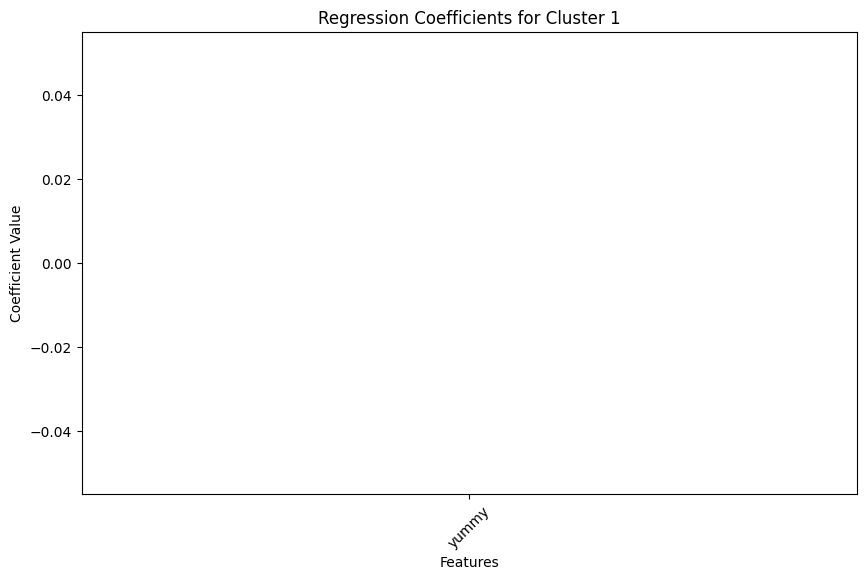

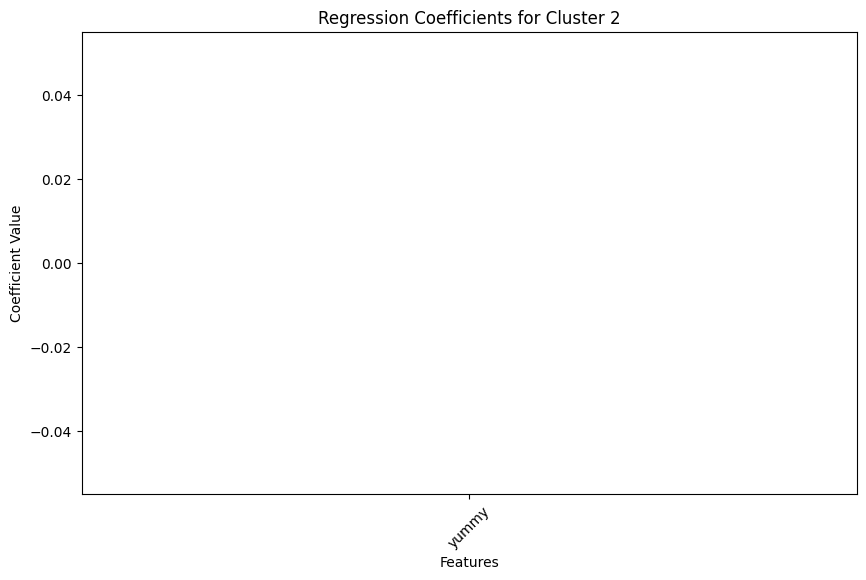

In [ ]:
""" 
R> f <- paste(names(mcdonalds)[1:11], collapse = "+")
R> f <- paste("Like.n ~ ", f, collapse = "")
R> f <- as.formula(f)
R> f
R> set.seed(1234)
R> MD.reg2 <- stepFlexmix(f, data = mcdonalds, k = 2,
+ nrep = 10, verbose = FALSE)
R> MD.reg2
R> MD.ref2 <- refit(MD.reg2)
R> summary(MD.ref2)
R> plot(MD.ref2, significance = TRUE)
"""

import statsmodels.api as sm
# Identify columns with non-numeric values
for col in mcdonalds.columns:
    if mcdonalds[col].dtype == 'object':  # Categorical columns (strings)
        print(f"Column {col} contains non-numeric values")
        
# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to columns with categorical data
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                       'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for col in categorical_columns:
    if mcdonalds[col].dtype == 'object':  
        mcdonalds[col] = label_encoder.fit_transform(mcdonalds[col].astype(str))

# Prepare the feature matrix (X) and target variable (y)
X = mcdonalds[categorical_columns].values
y = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')  

# Fit the Gaussian Mixture model (equivalent to stepFlexmix in R)
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

# Predict the cluster labels
clusters = gmm.predict(X)

# Add the cluster labels to the dataframe
mcdonalds['Cluster'] = clusters

# Fit a linear regression model for each cluster using statsmodels
X_with_intercept = sm.add_constant(X)  # Add constant for intercept

# List to hold the regression results for each cluster
regression_results = []

for cluster_id in np.unique(clusters):
    cluster_data = mcdonalds[mcdonalds['Cluster'] == cluster_id]
    X_cluster = X_with_intercept[cluster_data.index]
    y_cluster = y[cluster_data.index]

    # Fit the model
    model = sm.OLS(y_cluster, X_cluster).fit()
    regression_results.append(model)

# Display the regression summaries for each cluster
for idx, model in enumerate(regression_results):
    print(f"Cluster {idx + 1} Regression Summary:")
    print(model.summary())

# Plot the significance of the regression coefficients (just a basic example)
for idx, model in enumerate(regression_results):
    plt.figure(figsize=(10, 6))
    plt.bar(categorical_columns, model.params[1:], color='skyblue')
    plt.title(f"Regression Coefficients for Cluster {idx + 1}")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.xticks(rotation=45)
    plt.show()


C:\Users\amren\AppData\Local\Temp\ipykernel_18376\978683262.py:33: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, 'ward')


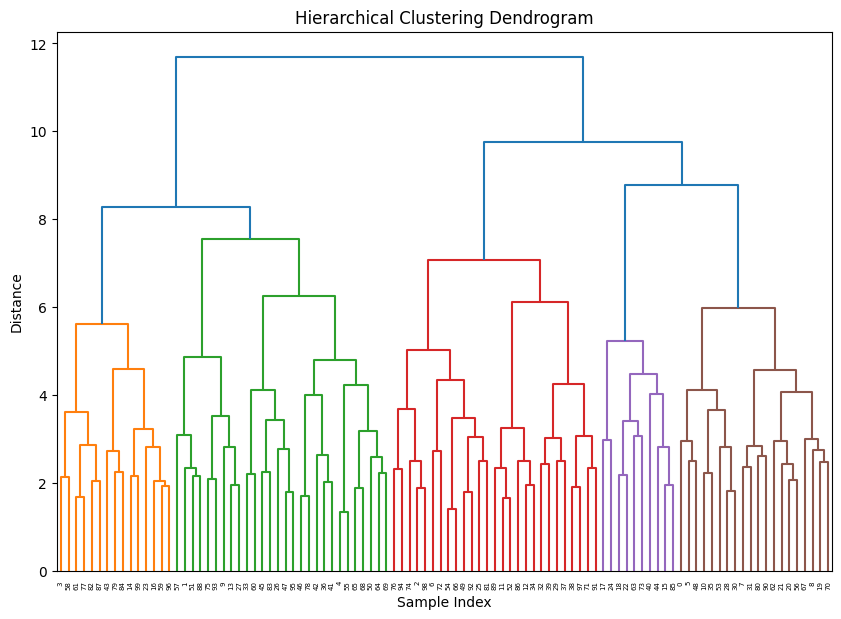

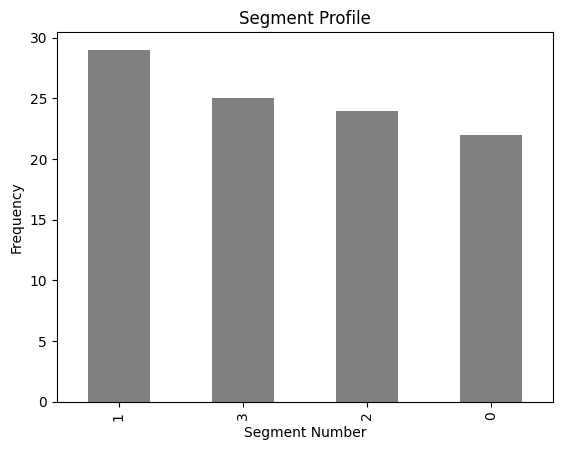

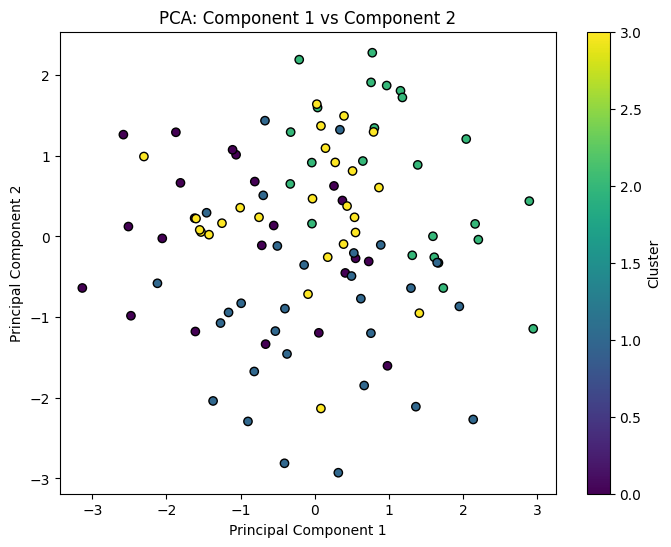

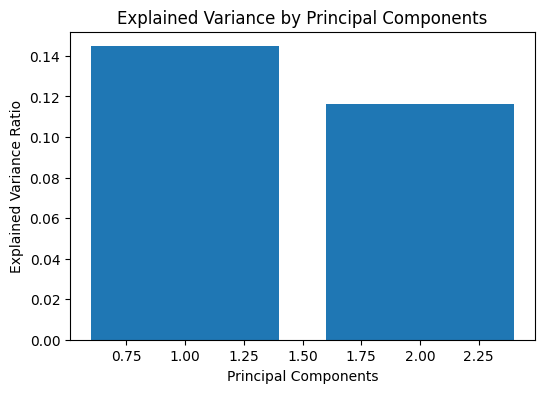

In [33]:
""" 
R> MD.vclust <- hclust(dist(t(MD.x)))
R> barchart(MD.k4, shade = TRUE,
+ which = rev(MD.vclust$order))
R> plot(MD.k4, project = MD.pca, data = MD.x,
+ hull = FALSE, simlines = FALSE,
+ xlab = "principal component 1",
+ ylab = "principal component 2")
R> projAxes(MD.pca)
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram



# Let's assume MD.x is a pandas DataFrame with your features
# Example: Replace this with your actual dataset
MD_x = pd.DataFrame({
    'yummy': np.random.rand(100),
    'convenient': np.random.rand(100),
    'spicy': np.random.rand(100),
    'fattening': np.random.rand(100),
    'greasy': np.random.rand(100),
    'fast': np.random.rand(100),
    'cheap': np.random.rand(100),
    'tasty': np.random.rand(100),
    'expensive': np.random.rand(100),
    'healthy': np.random.rand(100),
    'disgusting': np.random.rand(100)
})

# Step 1: Hierarchical Clustering (hclust in R)
# Calculate distance matrix (Euclidean distance)
dist_matrix = np.linalg.norm(MD_x.values[:, np.newaxis] - MD_x.values, axis=2)

# Perform hierarchical clustering (using linkage method)
Z = linkage(dist_matrix, 'ward')

# Plot Dendrogram (equivalent of plot for hierarchical clustering)
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Assuming you have performed clustering (e.g., KMeans or another method)
# Example: Using KMeans for clustering (replace with your own clustering results)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)  # Cluster assignments for each sample

# Step 2: Segment Profile Plot (Bar Chart)
# Visualizing the cluster assignments in a bar chart
cluster_counts = pd.Series(MD_k4).value_counts()  # Adjust based on your clusters
cluster_counts.plot(kind='bar', color='gray')
plt.title('Segment Profile')
plt.xlabel('Segment Number')
plt.ylabel('Frequency')
plt.show()

# Step 3: PCA (Principal Component Analysis)
# Standardizing the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(MD_x)

# Performing PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 4: PCA Scatter Plot
# Visualizing PCA with the first two components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=MD_k4, cmap='viridis', edgecolors='k')
plt.title('PCA: Component 1 vs Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Projecting the axes (similar to projAxes in R)
# Plot the explained variance ratio
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


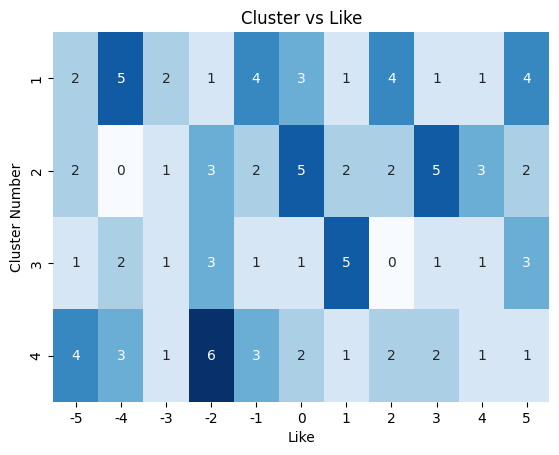

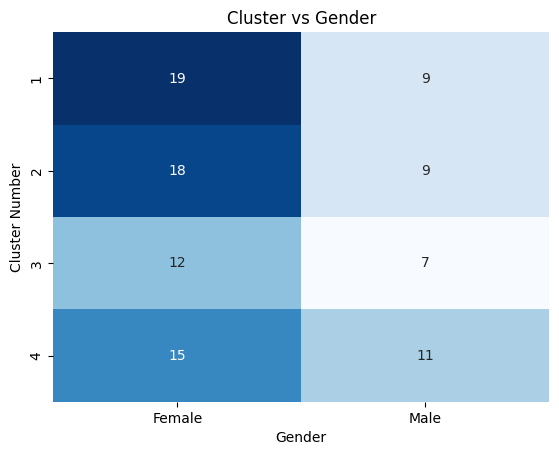

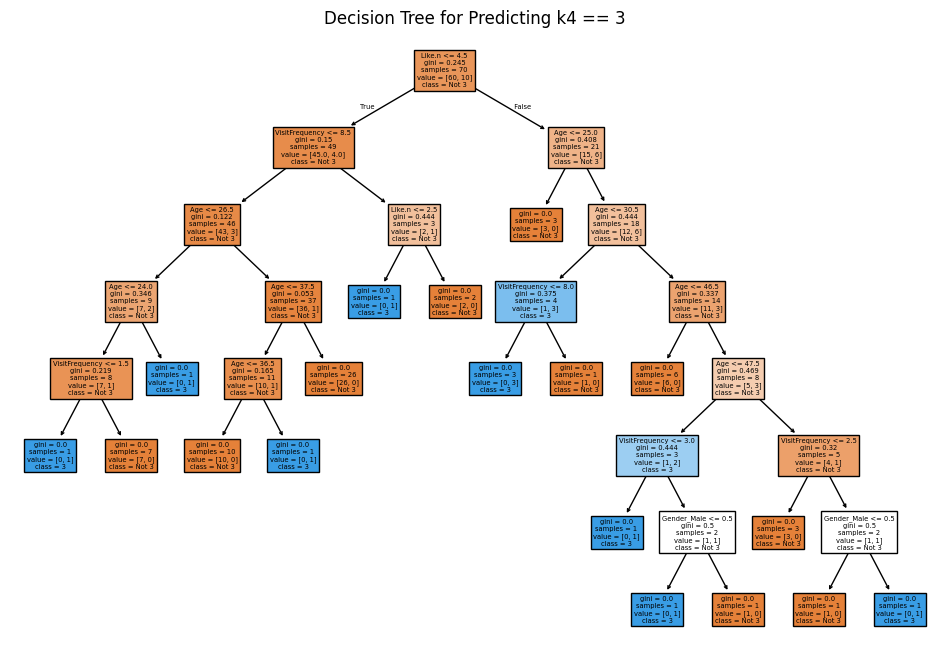

In [34]:
""" 
R> k4 <- clusters(MD.k4)
R> mosaicplot(table(k4, mcdonalds$Like), shade = TRUE,+ main = "", xlab = "segment number")  
R> mosaicplot(table(k4, mcdonalds$Gender), shade = TRUE)  
R> library("partykit")
R> tree <- ctree(+ factor(k4 == 3) ~ Like.n + Age +
+ VisitFrequency + Gender,
+ data = mcdonalds)
R> plot(tree)  
"""
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Example: Creating sample data (replace this with your actual dataset)
# Replace with your dataset (e.g., mcdonalds.csv)
mcdonalds = pd.DataFrame({
    'Like': np.random.choice([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Age': np.random.randint(18, 65, size=100),
    'VisitFrequency': np.random.randint(1, 10, size=100),
    'Like.n': np.random.randint(1, 6, size=100),  # Like.n = 6 - as.numeric(Like) in R
})

# Assuming k4 is the cluster labels obtained from clustering
k4 = np.random.choice([1, 2, 3, 4], size=100)  # Example clusters (replace with actual clusters)

# Step 1: Mosaic Plot Equivalent (Contingency Plot)
# Contingency table: k4 vs Like (mcdonalds['Like'])
contingency_like = pd.crosstab(k4, mcdonalds['Like'])
sns.heatmap(contingency_like, annot=True, cmap='Blues', cbar=False)
plt.title('Cluster vs Like')
plt.xlabel('Like')
plt.ylabel('Cluster Number')
plt.show()

# Contingency table: k4 vs Gender (mcdonalds['Gender'])
contingency_gender = pd.crosstab(k4, mcdonalds['Gender'])
sns.heatmap(contingency_gender, annot=True, cmap='Blues', cbar=False)
plt.title('Cluster vs Gender')
plt.xlabel('Gender')
plt.ylabel('Cluster Number')
plt.show()

# Step 2: Decision Tree Classification (ctree equivalent)
# Using DecisionTreeClassifier from sklearn
# Assuming that the target is whether k4 == 3 (a binary classification problem)
X = mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variable (Gender) to dummies
y = (k4 == 3).astype(int)  # Target: Whether k4 == 3

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Not 3', '3'], filled=True)
plt.title('Decision Tree for Predicting k4 == 3')
plt.show()

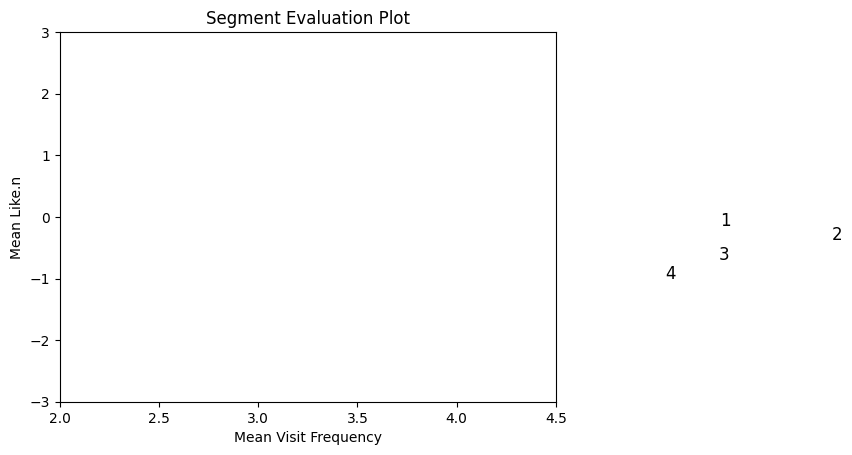

Visit means by cluster:
1    5.357143
2    5.916667
3    5.347826
4    5.080000
Name: VisitFrequency, dtype: float64

Like means by cluster:
1   -0.142857
2   -0.375000
3   -0.695652
4   -1.000000
Name: Like.n, dtype: float64

Female proportion by cluster:
1    0.464286
2    0.416667
3    0.347826
4    0.360000
Name: Gender, dtype: float64


In [37]:
""" 
R> visit <- tapply(as.numeric(mcdonalds$VisitFrequency),
+ k4, mean)
R> visit
R> like <- tapply(mcdonalds$Like.n, k4, mean)
R> like
R> female <- tapply((mcdonalds$Gender == "Female") + 0,
+ k4, mean)
R> female
R> plot(visit, like, cex = 10 * female,
+ xlim = c(2, 4.5), ylim = c(-3, 3))
R> text(visit, like, 1:4)
"""

# Step 2: Plot the segment evaluation
plt.scatter(visit, like, s=10*female, c=female, cmap='viridis', alpha=0.7)  # Point size is based on 'female'
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Adding text labels for each point using the actual indices (cluster labels)
for i, (v, l) in enumerate(zip(visit, like), start=1):  # Iterate over visit and like values
    plt.text(v, l, str(i), fontsize=12, ha='center')

# Add labels and title
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like.n')
plt.title('Segment Evaluation Plot')

# Show plot
plt.show()

# Print the computed values for verification
print("Visit means by cluster:")
print(visit)
print("\nLike means by cluster:")
print(like)
print("\nFemale proportion by cluster:")
print(female)
